## Preprocessing Exercises

# Part 1: global thresholds

### Exercise: Load and visualize the "nucleus" dataset.

In [1]:
#run me to import the libraries that you'll need for this exercise
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
sns.set_style('dark', rc={'image.cmap':'inferno'})
import matplotlib.axes as ax

Visualize the metadata associated with this dataset.

In [2]:
#run me to load data needed for the exercise and its associated metadata
data_nodrug = imread("../data/confocal_drug_panel/DMSO.tif")

import json
with open('../data/confocal_drug_panel/DMSO_metadata.json', mode='r') as f_nodrug:
    meta_nodrug = json.load(f_nodrug)

Use the metadata, the "shape" command, and/or visualization of the slice to deterine to determine what "VARIABLE" here denotes. Choose an appropriate value for this dataset. 

In [3]:
#run me to organize the data into a form that's easier to index    
VARIABLE = 1 #change me
nodrug_slice = {}
for idx, channel in enumerate(meta_nodrug['channels']):
    nodrug_slice[channel] = data_nodrug[VARIABLE,:,:,idx]
data = nodrug_slice['nucleus']

Change the crop parameters to crop out a nucleus in the middle of the image (1) and one on the edge of the image (2) for visualization in the rest of the exercise. Run the cell.

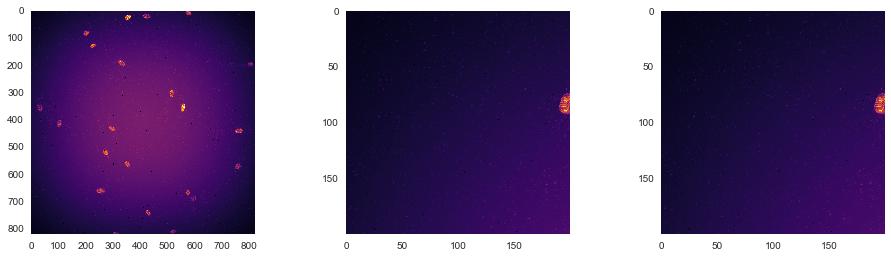

In [4]:
#parameters to adjust
minX1 = 1 #crop edges for a cell in the center of field of view
minY1 = 1
minX2 = 1 #crop edges for cell at the edge of the field of view
minY2 = 1
crop_size = 200 #pix
image_view_thresh = 0.7 #set for the entire notebook so can compare outputs more easily

#run
maxX1 = minX1 + crop_size
maxY1 = minY1 + crop_size
maxX2 = minX2 + crop_size
maxY2 = minY2 + crop_size

c1 = data[minY1 : maxY1, minX1 : maxX1] #crop of a nucleus in the center of the image
c2 = data[minY2 : maxY2, minX2 : maxX2] #crop of the nucleus at the edge of the image

top = data.max() * image_view_thresh

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(data, vmin=0, vmax=top, interpolation = 'nearest')
ax[1].imshow(c1, vmin=0, vmax=top, interpolation = 'nearest')
ax[2].imshow(c2, vmin=0, vmax=top, interpolation = 'nearest')

### Exercise: Choose a global threshold for this dataset. Run the cell, and then use the sliding bar to visualize different thresholds.

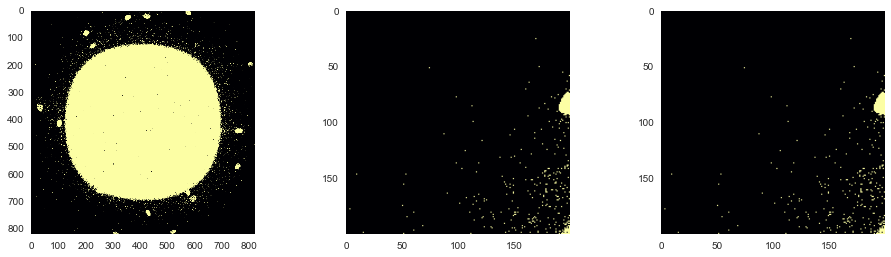

In [5]:
from ipywidgets import interactive
@interactive
def show_masks(thresh=(0, data.max() * 0.3, 40)):
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))
    mask = np.zeros(data.shape)
    mask[data >=thresh] = 1
    mask_zoom_center = mask[minY1 : maxY1 , minX1 : maxX1]
    mask_zoom_edge = mask[minY2 : maxY2 , minX2 : maxX2]
    ax[0].imshow(mask, vmin=0, vmax=1)
    ax[1].imshow(mask_zoom_center, vmin=0, vmax=1)
    ax[2].imshow(mask_zoom_edge, vmin=0, vmax=1)
show_masks

### Exercise: view the histogram of pixel values for the dataset. Does Otsu's method make sense? 

### Exercise: Determine what is incorrect about the application of Otsu's method below (there are two independent errors)

the Otsu masking threshold for this dataset is: 4963.54060708


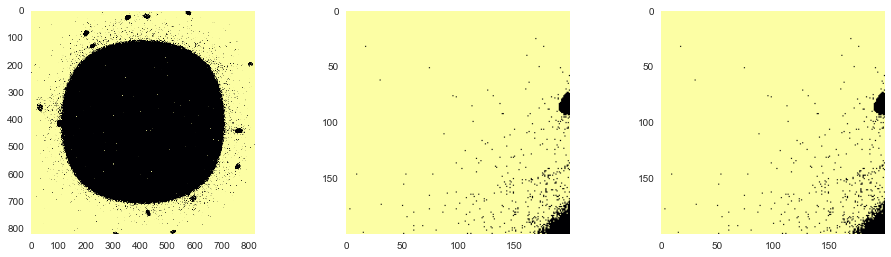

In [6]:
from skimage import filters
thresh = filters.threshold_li(data)
print("the Otsu masking threshold for this dataset is:", thresh)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
mask = np.zeros(data.shape)
mask[data <=thresh] = 1

mask_zoom_center = mask[minY1 : maxY1 , minX1 : maxX1]
mask_zoom_edge = mask[minY2 : maxY2 , minX2 : maxX2]

ax[0].imshow(mask, vmin=0, vmax=1)
ax[1].imshow(mask_zoom_center, vmin=0, vmax=1)
ax[2].imshow(mask_zoom_edge, vmin=0, vmax=1)

# Part 2: Rank filters

### **Exercise** Match the output image to the operation that produced it (from a single input image)

Match the sample figure to the type of operation performed on it (with a disk structuring element)

1) Mean filter, s=10
2) Min filter, s=10
3) Max filter, s=10
4) Mean filter, s=2
5) Min filter, s=2
6) Max filter, s=2

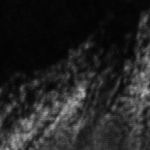

In [7]:
from IPython.display import Image # Access IPython's browser-based image display.
Image("../fig/raw_for_types_of_filters_exercise.png") # Quickly display a diagram we saved in a file

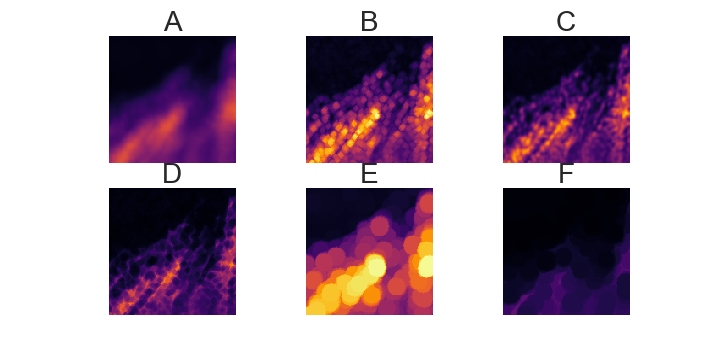

In [8]:
Image("../fig/types_of_filters_exercise.png") # Quickly display a diagram we saved in a file

### **Exercise** Otsu's method performs sub-optimally in this case because of the distribution of background and foreground values. 
Find the documentation for the scipy filter options and determine if another thresholding algorithm would be more appropriate. 